# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Савранский Данила Сергеевич. Вариант №11.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

### 1. Плотность сети

Показывает, какая доля возможных связей реально существует в сети:  

$$
D = \frac{E}{\frac{n(n-1)}{2}}
$$

$E$ — число существующих ребер в сети,  
$n$ — число узлов сети.

---

### 2. Коэффициент кластеризации

Показывает, насколько узлы имеют склонность образовывать треугольники:  

$$
C_i = \frac{2T_i}{k_i (k_i - 1)}
$$

$T_i$ — число треугольников, включающих узел $i$,  
$k_i$ — степень узла $i$.  

Средний коэффициент кластеризации для сети:  

$$
C = \frac{1}{n} \sum_{i=1}^{n} C_i
$$

---

### 3. Центральность

**Степень (Degree centrality)**  

$$
C_D(n_i) = \frac{\text{deg}(n_i)}{n-1}
$$

$\text{deg}(n_i)$ — число соседей узла $n_i$,  
$n$ — число узлов сети.

**Близость (Closeness centrality)**  

$$
C_C(n_i) = \frac{n-1}{\sum_{j \neq i} d(n_i, n_j)}
$$

$d(n_i, n_j)$ — кратчайшее расстояние между узлами $n_i$ и $n_j$.

**Посредничество (Betweenness centrality)**  

$$
C_B(n_i) = \sum_{s \lt t} \frac{\sigma_{st}(n_i)}{\sigma_{st}}
$$

$\sigma_{st}$ — число кратчайших путей между $s$ и $t$,  
$\sigma_{st}(n_i)$ — число кратчайших путей, проходящих через $n_i$.

$$
C_B'(n_i) = \frac{2C_B(n_i)}{(n-1)(n-2)}
$$

**Информационная центральность (Information centrality)**  

Алгоритм нахождения:

1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \\times g$

2) Вычислить обратную матрицу $A^{-1} = C$
        
3) $T = Tr(C)$, $R = ∑c_{ij}$
        
Тогда центральность по информации:
$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:
        
$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$

---

### 4. Престиж

**Indegree prestige**  

$$
P'_D(n_i) = \frac{\sum_{j} A_{ji}}{n-1}
$$

$A$ — матрица смежности сети,  
$A_{ji} = 1$, если $j$ связан с $i$.

**Closeness prestige (с квадратом достижимости)**  

$$
P'_C(n_i) =  \frac{(I_i)^2}{(n-1)\sum_{j \neq i} d(n_i, n_j)}
$$

$d(n_i,n_j)$ — кратчайшее расстояние от $n_i$ до $n_j$.

**Rank prestige (статусная престижная центральность)**  

Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:
- $X$ — социоматрица
- $a = \\frac{1}{\\lambda}$, где $\\lambda$ — максимальное собственное значение матрицы $X$
- $x$ — вектор сумм столбцов
- $E$ — единичная матрица

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать

## Выполнение работы

1. Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [21]:
library(igraph)
library(network)

In [2]:
data <- read.csv("florentine_business.csv", header = TRUE, comment.char = "#")

m <- as.matrix(data)

m

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [3]:
g <- graph_from_adjacency_matrix(m)

edges <- as_edgelist(g)

edges[1:5,]

Barbadori,Castellani
Barbadori,Ginori
Barbadori,Medici
Barbadori,Peruzzi
Bischeri,Guadagni


3. Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев)

In [4]:
rownames(m) <- colnames(m)

print(rownames(m))
print(colnames(m))

 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  


4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [5]:
#              Сама матрица   Считатать ли ее напр.  Считывать ли петли   Тип матрицы
net <- network(m,             directed = FALSE,      loops = FALSE,       matrix.type = "adjacency")

5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—Рейнгольда и Камада—Каваи. Объяснить, в чём различие между алгоритмами и укладками

In [22]:
library(sna)

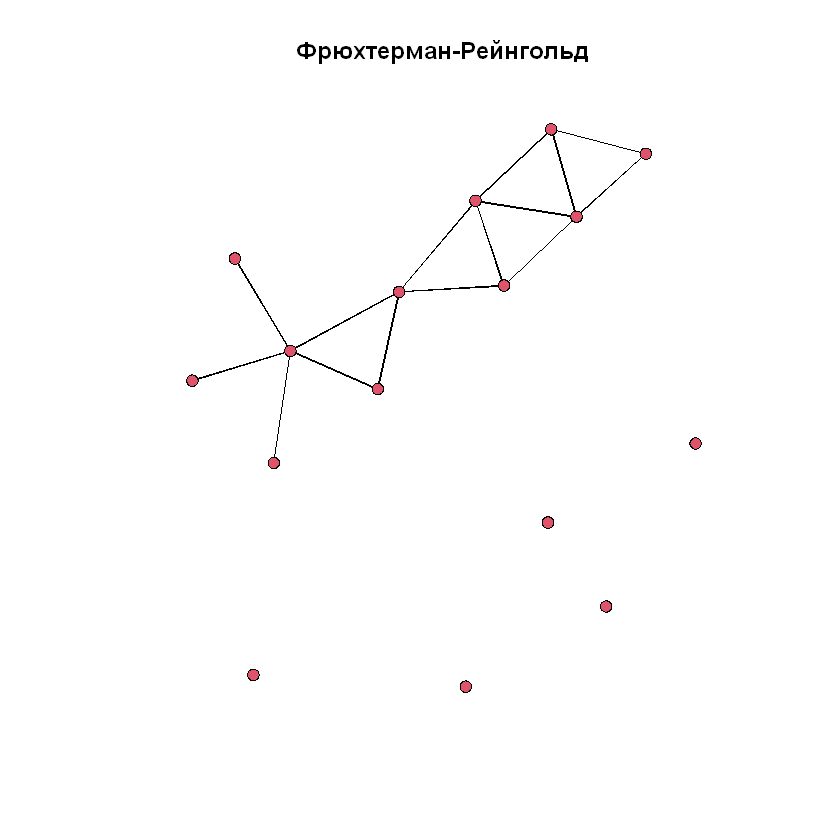

In [7]:
plot(net, main = "Фрюхтерман-Рейнгольд", mode = "fruchtermanreingold")

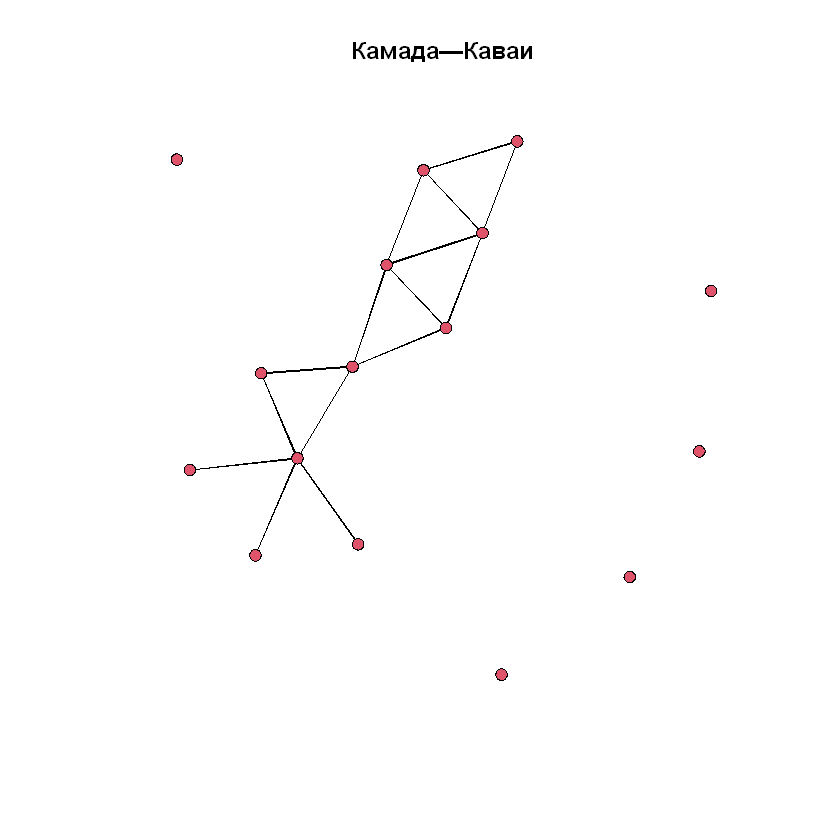

In [8]:
plot(net, main = "Камада—Каваи", mode = "kamadakawai")

Метод Фрухтермана-Рейнгольда фокусируется на равномерном расположении узлов для визуального баланса, а метод Камада-Каваи делает акцент на сохранении графовых расстояний между.

6. Вывести «описательную сводку» сети.

In [9]:
summary(net)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    5    3
 [2,]    6    3
 [3,]    9    3
 [4,]   11    3
 [5,]    7    4
 [6,]    8    4
 [7,]   11    4
 [8,]    8    5
 [9,]   11    5
[10,]    9    6
[11,]    8    7
[12,]   11    8
[13,]   10    9
[14,]   14    9
[15,]   16    9

7. Вычислить «пятичисловую сводку» сети:
   
(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать
выводы.

(d) Вычислить диаметр сети. Сделать выводы

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [10]:
ns <- network.size(net)
cat("Размер сети:", ns, "\n")

es <- network.edgecount(net)

density <- (es * 2) / (ns * (ns - 1))
cat("Плотность сети:", density, "\n")
cat("Плотность сети функция:", round(gden(m), 3), "\n\n")

cs <- components(net)
cat("Количество компонент:", cs, "\n")

diam <- diameter(g)
cat("Диаметр:", diam, "\n")

cluster <- gtrans(net)
cat("Коэффициент кластеризации:", cluster, "\n")

Размер сети: 16 
Плотность сети: 0.125 
Плотность сети функция: 0.125 

Количество компонент: 6 
Диаметр: 5 
Коэффициент кластеризации: 0.4166667 


Плотность сети: Присутствуют только 1/8 возможных связей.

Количество компонент: Многие семьи не связаны между собой ни напрямую, ни через посредников.

Диаметр: Узлы могут быть относительно далеко друг от друга даже в связной части сети.

Коэффициент кластеризации: Узлы образуют небольшие локальные группы.

8. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин:

In [11]:
deg <- degree(net, gmode="graph")

iso_nodes <- which(deg == 0)

net_no_iso <- net

delete.vertices(net_no_iso, iso_nodes)

deg <- degree(net_no_iso, gmode="graph")

C_D <- deg / (ns - 1)

C_C <- closeness(net_no_iso)

C_B <- betweenness(net_no_iso, gmode="graph")

C_I <- infocent(net_no_iso, gmode="graph")

centrality_table <- data.frame(
  Node = network.vertex.names(net_no_iso),
  Degree = round(C_D, 2),
  Closeness = round(C_C, 2),
  Betweenness = round((2 * C_B) / ((ns - 1) * (ns - 2)), 2),
  InfoCentrality = round(C_I / sum(C_I), 2)
)

print(centrality_table)

           Node Degree Closeness Betweenness InfoCentrality
1     Barbadori   0.27      0.59        0.24           0.12
2      Bischeri   0.20      0.40        0.02           0.09
3    Castellani   0.20      0.50        0.05           0.10
4        Ginori   0.13      0.45        0.00           0.10
5      Guadagni   0.13      0.31        0.00           0.08
6  Lamberteschi   0.27      0.42        0.06           0.10
7        Medici   0.33      0.53        0.23           0.11
8         Pazzi   0.07      0.36        0.00           0.06
9       Peruzzi   0.27      0.53        0.13           0.11
10     Salviati   0.07      0.36        0.00           0.06
11   Tornabuoni   0.07      0.36        0.00           0.06


Medici и Barbadori занимают центральное положение с наибольшей степенью и близостью, связывая множество вершин. Barbadori, Medici и Peruzzi - мосты между группами. Pazzi, Salviati и Tornabuoni почти изолированы, что логично, ведь они являются листами.

9. Выполнить п. 2–7 для направленной сети из файла krackhardt_advice.csv (для нечётных вариантов) и файла krackhardt_friendship.csv (для чётных вариантов)

In [12]:
data <- read.csv("krackhardt_advice.csv", header = FALSE, comment.char = "#")

m <- as.matrix(data)

m

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


In [13]:
g <- graph_from_adjacency_matrix(m)

edges <- as_edgelist(g)

edges[1:5,]

V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


In [14]:
rownames(m) <- c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21")
colnames(m) <- rownames(m)
print(rownames(m))
print(colnames(m))

 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"


In [15]:
#              Сама матрица   Считатать ли ее напр.  Считывать ли петли   Тип матрицы
net <- network(m,             directed = TRUE,      loops = FALSE,       matrix.type = "adjacency")

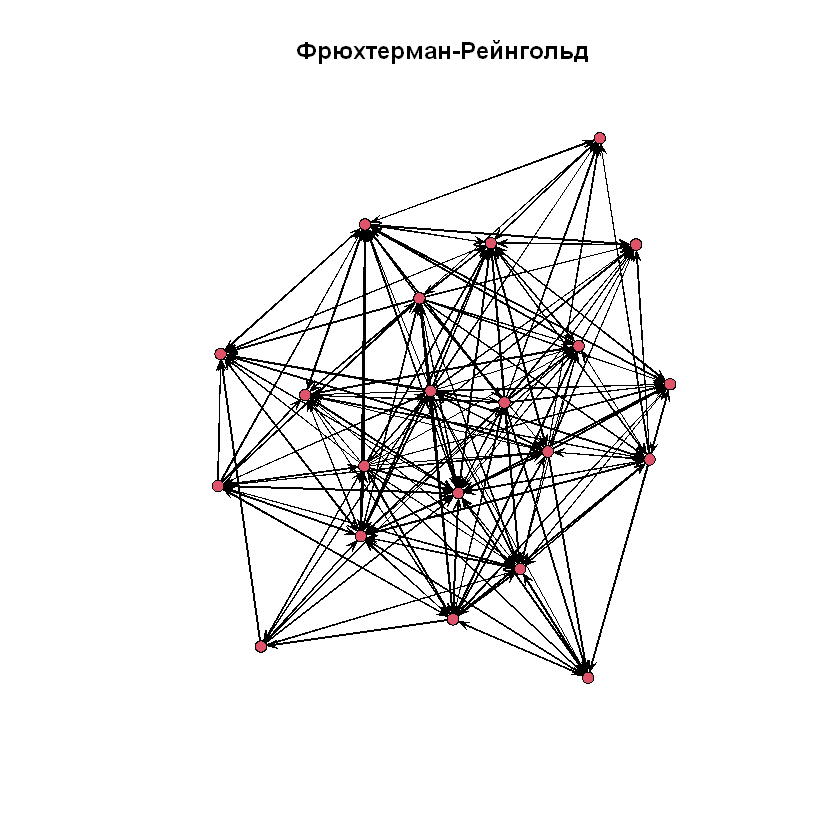

In [16]:
library(sna)

plot(net, main = "Фрюхтерман-Рейнгольд", mode = "fruchtermanreingold")

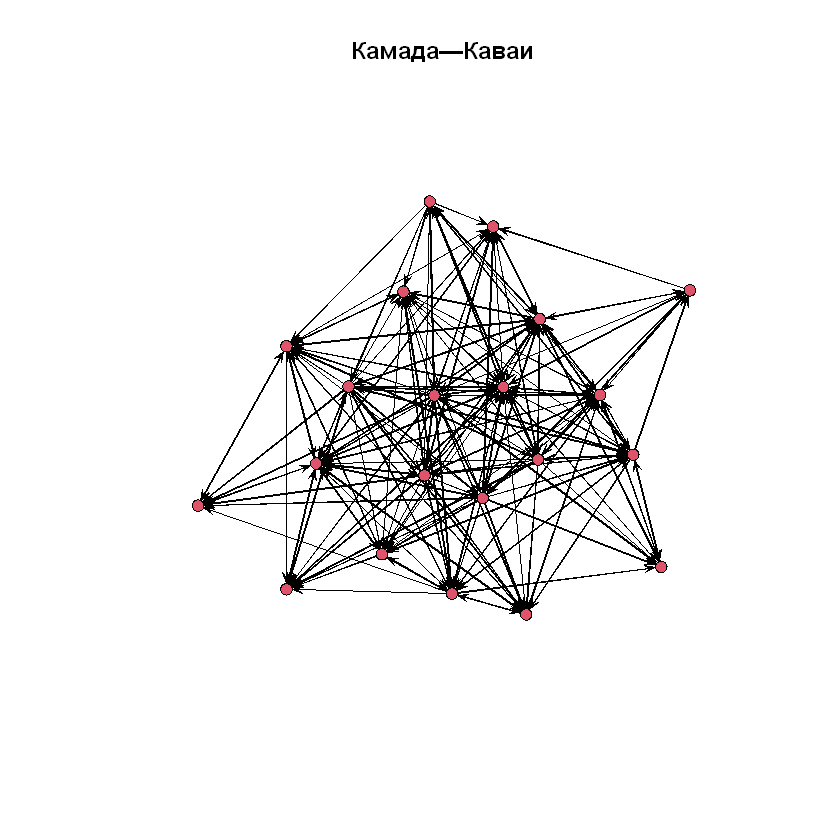

In [17]:
plot(net, main = "Камада—Каваи", mode = "kamadakawai")

In [18]:
summary(net)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

In [19]:
ns <- network.size(net)
cat("Размер сети:", ns, "\n")

es <- network.edgecount(net)

density <- es / (ns * (ns - 1))
cat("Плотность сети:", density, "\n")

cs <- components(net)
cat("Количество компонент:", cs, "\n")

diam <- diameter(g)
cat("Диаметр:", diam, "\n")

cluster <- gtrans(net)
cat("Коэффициент кластеризации:", cluster, "\n")

Размер сети: 21 
Плотность сети: 0.452381 
Количество компонент: 1 
Диаметр: 3 
Коэффициент кластеризации: 0.6639785 


10. Заполнить таблицу для различных мер престижа. Сделать выводы.

In [20]:
indegree <- colSums(m)                 
P_D <- indegree / (ns - 1)             
P_D <- round(P_D, 2)

I_i <- rowSums(igraph::distances(g, mode="out") > 0)
P_P <- (I_i^2) / (ns - 1) * igraph::closeness(g, mode="in", normalized=FALSE)
P_P <- round(P_P, 2)

eig <- eigen(m)$values
lambda <- max(Re(eig))
I <- diag(ns)

P_R <- solve(ceiling(lambda)*I - t(m), colSums(m))
P_R <- round(P_R / sum(P_R), 3)

prestige_table <- data.frame(
  P_D = P_D,
  P_P = P_D,
  P_R = P_R
)

print(prestige_table)

    P_D  P_P   P_R
1  0.65 0.65 0.059
2  0.90 0.90 0.097
3  0.25 0.25 0.030
4  0.40 0.40 0.050
5  0.25 0.25 0.022
6  0.50 0.50 0.059
7  0.65 0.65 0.074
8  0.50 0.50 0.054
9  0.20 0.20 0.018
10 0.45 0.45 0.041
11 0.55 0.55 0.054
12 0.35 0.35 0.039
13 0.20 0.20 0.020
14 0.50 0.50 0.050
15 0.20 0.20 0.022
16 0.40 0.40 0.040
17 0.45 0.45 0.047
18 0.75 0.75 0.076
19 0.20 0.20 0.020
20 0.40 0.40 0.042
21 0.75 0.75 0.088


## Выводы

Была проведена работа с сетью, включающая построение графа, вычисление мер центральности и престижа. Освоены методы работы с математическими пакетами R для моделирования, визуализации и анализа социальных сетей